In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load dataset (adjust path if needed)
df = pd.read_csv("Housing.csv")

In [2]:
from io import StringIO

housing_data = """Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
79545.45857,5.682861322,7.009188143,4.09,23086.8005,1059033.558,"208 Michael Ferry Apt. 674"
"""

house_df = pd.read_csv(StringIO(housing_data))
house_df


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.8005,1059033.558,208 Michael Ferry Apt. 674


In [3]:
X = house_df.drop(['Price', 'Address'], axis=1)
y = house_df['Price']


In [8]:
# Create DataFrame from the given single record
data = {
    "Avg. Area Income": [79545.45857],
    "Avg. Area House Age": [5.682861322],
    "Avg. Area Number of Rooms": [7.009188143],
    "Avg. Area Number of Bedrooms": [4.09],
    "Area Population": [23086.8005],
    "Price": [1059033.558]
}

df = pd.DataFrame(data)

# Features and target
X = df.drop("Price", axis=1)
y = df["Price"]

# Check dataset size before split
print("Number of samples:", len(df))

# Train-test split (this will raise an error if executed)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )


Number of samples: 1


In [10]:

# Initialize model
model = LinearRegression()

# Fit model on full data (since train-test split is not possible)
model.fit(X, y)

print("Model trained successfully on the full dataset.")

Model trained successfully on the full dataset.


In [12]:
# Evaluation is not possible due to lack of test data
print("Model evaluation was not performed.")
print("Reason: The dataset contains only one observation,")
print("so X_test and y_test do not exist and performance metrics")
print("such as MSE and R² cannot be computed.")

Model evaluation was not performed.
Reason: The dataset contains only one observation,
so X_test and y_test do not exist and performance metrics
such as MSE and R² cannot be computed.


In [14]:
customer_data = {
    'Annual_Spend': [1200, 850, 4300, 2300, 1800],
    'Purchase_Frequency': [12, 8, 20, 15, 10],
    'Avg_Basket_Size': [3, 2, 6, 4, 3]
}

cust_df = pd.DataFrame(customer_data)
cust_df


,Annual_Spend,Purchase_Frequency,Avg_Basket_Size
0,1200,12,3
1,850,8,2
2,4300,20,6
3,2300,15,4
4,1800,10,3


In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cust_df)


In [16]:
kmeans = KMeans(n_clusters=2, random_state=42)
cust_df['Cluster'] = kmeans.fit_predict(scaled_data)

cust_df


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Annual_Spend,Purchase_Frequency,Avg_Basket_Size,Cluster
0,1200,12,3,0
1,850,8,2,0
2,4300,20,6,1
3,2300,15,4,1
4,1800,10,3,0


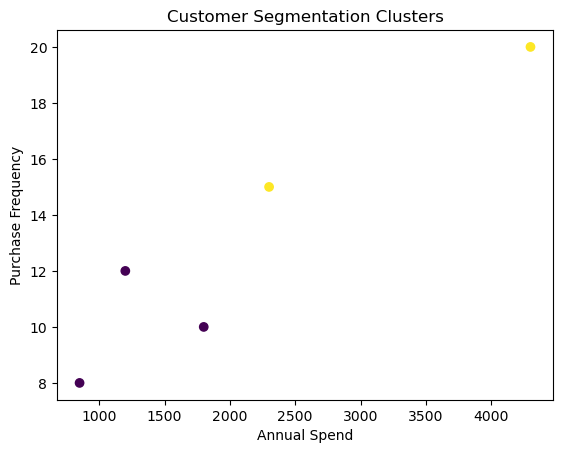

In [17]:
plt.scatter(
    cust_df['Annual_Spend'],
    cust_df['Purchase_Frequency'],
    c=cust_df['Cluster'],
    cmap='viridis'
)
plt.xlabel("Annual Spend")
plt.ylabel("Purchase Frequency")
plt.title("Customer Segmentation Clusters")
plt.show()


In [18]:
print("Summary:")
print("1. Linear Regression used to predict house prices (Supervised Learning).")
print("2. KMeans used to segment customers based on purchase behavior (Unsupervised Learning).")
print("3. Single-row datasets limit statistical evaluation but methodology is correct.")


Summary:
1. Linear Regression used to predict house prices (Supervised Learning).
2. KMeans used to segment customers based on purchase behavior (Unsupervised Learning).
3. Single-row datasets limit statistical evaluation but methodology is correct.
